# OVR GPU Metrics

### Preprocessing

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


def reset_timestamp(df):
    df['timestamp'] = df['timestamp'] - df['timestamp'][0]
    return df

def process_line(line):
    timestamp = line.split(' - ')[0]
    content = line.split(' - ')[1]
    key = str(content.split(':')[0].strip())
    value = float(content.split(':')[1].strip())
    return timestamp, key, value

def add_to_dataframe(df, timestamp, key, value):
    if key not in df.columns:
        df[key] = np.nan
    df.loc[timestamp, key] = value
    return df

def create_dataframe(file_path):
    df = pd.DataFrame()
    for line in open(file_path, 'r', encoding='utf-16'):
        if len(line) < 27:
            continue
        timestamp, key, value = process_line(line)
        df = add_to_dataframe(df, timestamp, key, value)

    df.index.name = 'timestamp'
    df = df.reset_index()

    df['device'] = file_path.split('\\')[1]
    df['app'] = file_path.split('\\')[2].strip('-W')
    df['app_details'] = file_path.split('\\')[3]
    df['is_record'] = 'record' in file_path.split('\\')[4]
    df['is_wireless'] = '-W' in file_path.split('\\')[2]
    df['repetition'] = file_path.split('\\')[4].strip('record') if 'record' in file_path.split('\\')[4] else file_path.split('\\')[4].strip('replay')

    df.to_csv(f'.\\{file_path.strip(".log")}.csv', index=False)

    return df

def process_OVR(folder_path):
    df_aggregated = pd.DataFrame()
    for root, dirs, files in os.walk(f"./{folder_path}", topdown=False):
        for name in files:
            if name == 'ovr_gpu_metrics.log':
                print(os.path.join(root, name))
                df_aggregated = pd.concat([df_aggregated, create_dataframe(os.path.join(root, name))]) 
    # df_aggregated
    return df_aggregated


In [3]:
ovr_df = process_OVR('overhead-validation')
ovr_df

./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\baseline0\ovr_gpu_metrics.log
./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\baseline1\ovr_gpu_metrics.log
./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\baseline2\ovr_gpu_metrics.log
./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\record0\ovr_gpu_metrics.log
./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\record1\ovr_gpu_metrics.log
./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\record2\ovr_gpu_metrics.log
./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\replay0.0\ovr_gpu_metrics.log
./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\replay0.1\ovr_gpu_metrics.log
./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\replay0.2\ovr_gpu_metrics.log
./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\replay0.3\ovr_gpu_metrics.log
./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\replay0.4\ovr_gpu_metrics.log
./overhead-validation\Quest-2\BeatSaber\PopStars-Medium\repl

,timestamp,Clocks / Second,GPU Frequency,GPU % Bus Busy,Preemptions / second,Avg Preemption Delay,% Vertex Fetch Stall,% Texture Fetch Stall,% Texture L1 Miss,% Texture L2 Miss,...,% Nearest Filtered,% Linear Filtered,% Anisotropic Filtered,% Non-Base Level Textures,device,app,app_details,is_record,is_wireless,repetition
0,12/15/2023 3:16:20 PM,144574144.0,525000000.0,42.427,69.700,3.952,1.815,59.985,29.977,6.955,...,0.001,100.000,0.001,0.000,Quest-2,BeatSaber,PopStars-Medium,False,False,baseline0
1,12/15/2023 3:16:21 PM,144474592.0,525000000.0,41.294,84.609,135.559,1.845,60.350,30.197,6.580,...,0.001,100.000,0.001,0.000,Quest-2,BeatSaber,PopStars-Medium,False,False,baseline0
2,12/15/2023 3:16:22 PM,150327520.0,525000000.0,43.557,69.667,3.951,1.721,59.783,29.630,7.703,...,0.001,100.000,0.001,0.000,Quest-2,BeatSaber,PopStars-Medium,False,False,baseline0
3,12/15/2023 3:16:23 PM,136988624.0,525000000.0,42.166,94.592,251.972,1.741,56.906,30.054,6.937,...,0.001,100.000,0.001,0.000,Quest-2,BeatSaber,PopStars-Medium,False,False,baseline0
4,12/15/2023 3:16:24 PM,143522848.0,525000000.0,41.555,89.490,205.339,1.793,59.197,30.077,6.848,...,0.001,100.000,0.001,0.000,Quest-2,BeatSaber,PopStars-Medium,False,False,baseline0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,12/15/2023 10:23:34 PM,217394032.0,525000000.0,24.074,158.439,103.402,1.110,27.930,32.693,6.864,...,0.222,99.817,0.002,0.000,Quest-Pro,BeatSaber,PopStars-Medium,False,False,2.9
244,12/15/2023 10:23:35 PM,218132976.0,525000000.0,23.660,164.110,73.361,1.094,27.520,32.701,6.821,...,0.253,99.709,0.002,0.050,Quest-Pro,BeatSaber,PopStars-Medium,False,False,2.9
245,12/15/2023 10:23:36 PM,220279728.0,525000000.0,23.770,169.125,26.461,1.101,27.615,32.669,6.883,...,0.223,99.779,0.002,0.000,Quest-Pro,BeatSaber,PopStars-Medium,False,False,2.9
246,12/15/2023 10:23:37 PM,229943360.0,525000000.0,23.390,133.418,2.746,1.184,29.531,32.829,6.214,...,0.202,99.794,0.001,0.008,Quest-Pro,BeatSaber,PopStars-Medium,False,False,2.9


In [3]:
bm = pd.read_csv("overall_energy.csv")
ovr_df["repetition"] = ovr_df["repetition"].astype(float)

In [4]:
bm_ovr = pd.merge(ovr_df, bm, how='left', on=['device', 'app', 'app_details', 'is_record', 'is_wireless', 'repetition'])

In [5]:
bm_ovr

,timestamp,Clocks / Second,GPU Frequency,GPU % Bus Busy,Preemptions / second,Avg Preemption Delay,% Vertex Fetch Stall,% Texture Fetch Stall,% Texture L1 Miss,% Texture L2 Miss,...,% Non-Base Level Textures,device,app,app_details,is_record,is_wireless,repetition,energy(J),length(s),Energy per Second (J/s)
0,12/5/2023 3:06:05 PM,266032064.0,525000000.0,33.312,168.880,26.754,1.227,32.984,30.415,7.687,...,0.018,Quest-2,BeatSaber,PopStars-Easy,True,False,0.0,868.569877,248.156,3.500096
1,12/5/2023 3:06:06 PM,270955808.0,525000000.0,31.584,203.993,15.596,1.225,31.561,30.418,7.554,...,0.001,Quest-2,BeatSaber,PopStars-Easy,True,False,0.0,868.569877,248.156,3.500096
2,12/5/2023 3:06:07 PM,267818560.0,525000000.0,29.295,199.131,11.821,1.272,31.142,30.539,7.216,...,0.001,Quest-2,BeatSaber,PopStars-Easy,True,False,0.0,868.569877,248.156,3.500096
3,12/5/2023 3:06:08 PM,212911472.0,525000000.0,49.151,69.703,2.869,1.571,51.449,31.137,7.377,...,0.000,Quest-2,BeatSaber,PopStars-Easy,True,False,0.0,868.569877,248.156,3.500096
4,12/5/2023 3:06:09 PM,263309680.0,525000000.0,29.755,199.035,8.325,1.388,31.402,30.661,7.491,...,0.016,Quest-2,BeatSaber,PopStars-Easy,True,False,0.0,868.569877,248.156,3.500096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17749,12/7/2023 4:30:50 PM,300047840.0,525000000.0,30.153,204.046,304.678,1.486,28.066,31.773,9.395,...,0.025,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0,2101.027088,236.976,8.865991
17750,12/7/2023 4:30:51 PM,313039136.0,525000000.0,31.258,216.728,348.529,1.401,28.917,31.665,9.458,...,0.029,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0,2101.027088,236.976,8.865991
17751,12/7/2023 4:30:52 PM,300441344.0,525000000.0,30.627,202.468,286.375,1.476,28.519,31.711,9.564,...,0.000,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0,2101.027088,236.976,8.865991
17752,12/7/2023 4:30:53 PM,305568256.0,525000000.0,30.697,203.733,335.984,1.477,29.020,31.766,9.535,...,0.000,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0,2101.027088,236.976,8.865991


In [6]:
# rename timestamp to time
ovr_df = ovr_df.rename(columns={'timestamp': 'time'})
ovr_df["timestamp"] = pd.to_datetime(ovr_df["time"])
ovr_df

C:\Users\damla\AppData\Local\Temp\ipykernel_41756\1491537227.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ovr_df["timestamp"] = pd.to_datetime(ovr_df["time"])


,time,Clocks / Second,GPU Frequency,GPU % Bus Busy,Preemptions / second,Avg Preemption Delay,% Vertex Fetch Stall,% Texture Fetch Stall,% Texture L1 Miss,% Texture L2 Miss,...,% Linear Filtered,% Anisotropic Filtered,% Non-Base Level Textures,device,app,app_details,is_record,is_wireless,repetition,timestamp
0,12/5/2023 3:06:05 PM,266032064.0,525000000.0,33.312,168.880,26.754,1.227,32.984,30.415,7.687,...,99.986,0.002,0.018,Quest-2,BeatSaber,PopStars-Easy,True,False,0.0,2023-12-05 15:06:05
1,12/5/2023 3:06:06 PM,270955808.0,525000000.0,31.584,203.993,15.596,1.225,31.561,30.418,7.554,...,100.000,0.002,0.001,Quest-2,BeatSaber,PopStars-Easy,True,False,0.0,2023-12-05 15:06:06
2,12/5/2023 3:06:07 PM,267818560.0,525000000.0,29.295,199.131,11.821,1.272,31.142,30.539,7.216,...,100.000,0.002,0.001,Quest-2,BeatSaber,PopStars-Easy,True,False,0.0,2023-12-05 15:06:07
3,12/5/2023 3:06:08 PM,212911472.0,525000000.0,49.151,69.703,2.869,1.571,51.449,31.137,7.377,...,100.000,0.001,0.000,Quest-2,BeatSaber,PopStars-Easy,True,False,0.0,2023-12-05 15:06:08
4,12/5/2023 3:06:09 PM,263309680.0,525000000.0,29.755,199.035,8.325,1.388,31.402,30.661,7.491,...,99.986,0.002,0.016,Quest-2,BeatSaber,PopStars-Easy,True,False,0.0,2023-12-05 15:06:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,12/7/2023 4:30:50 PM,300047840.0,525000000.0,30.153,204.046,304.678,1.486,28.066,31.773,9.395,...,99.826,0.001,0.025,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0,2023-12-07 16:30:50
212,12/7/2023 4:30:51 PM,313039136.0,525000000.0,31.258,216.728,348.529,1.401,28.917,31.665,9.458,...,99.811,0.001,0.029,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0,2023-12-07 16:30:51
213,12/7/2023 4:30:52 PM,300441344.0,525000000.0,30.627,202.468,286.375,1.476,28.519,31.711,9.564,...,99.855,0.001,0.000,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0,2023-12-07 16:30:52
214,12/7/2023 4:30:53 PM,305568256.0,525000000.0,30.697,203.733,335.984,1.477,29.020,31.766,9.535,...,99.874,0.001,0.000,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0,2023-12-07 16:30:53


In [7]:
# ovr_df.to_csv('overall_ovrgpu.csv', index=False)

## Analysis

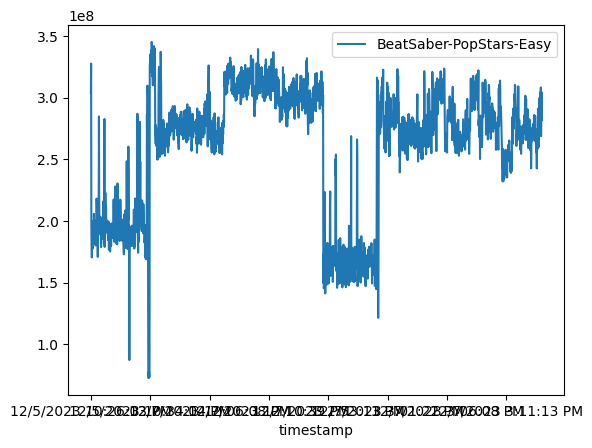

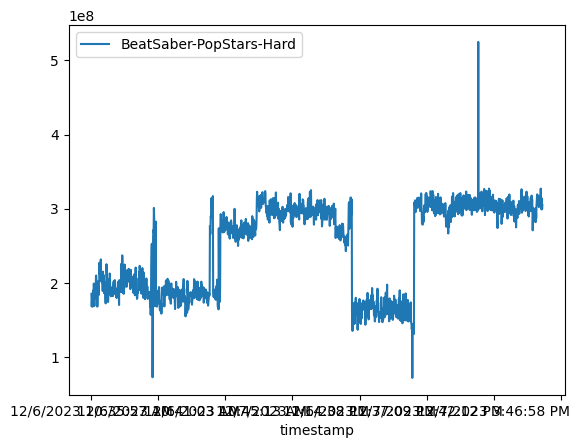

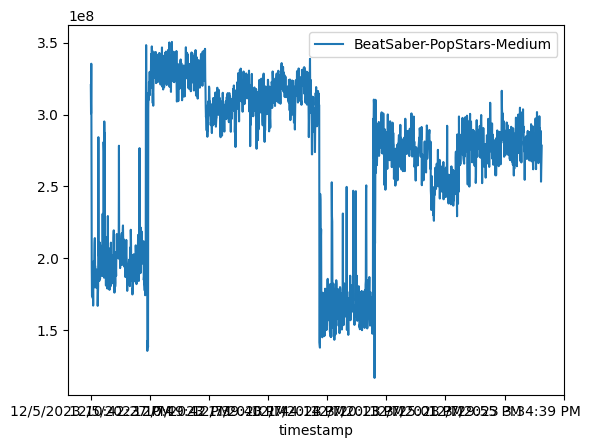

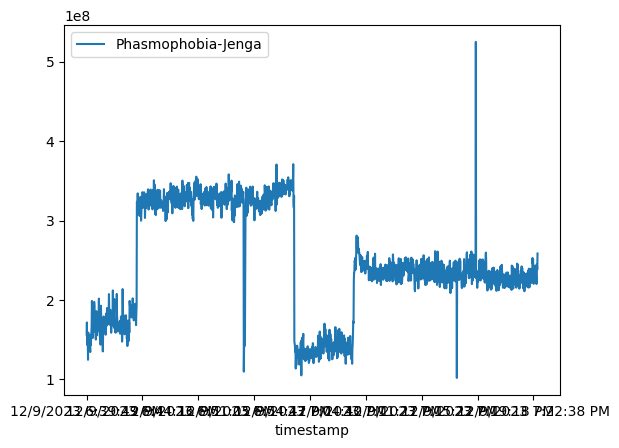

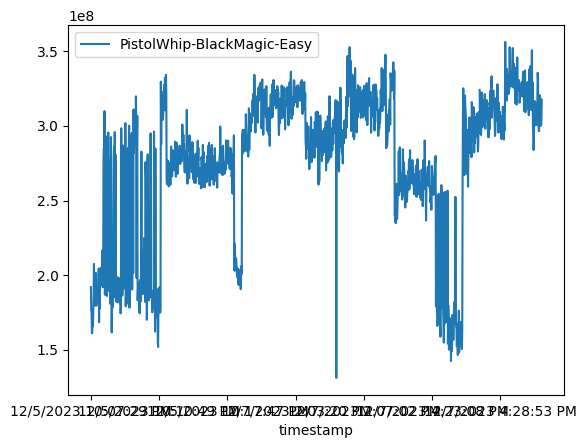

In [10]:
# TODO FIX THIS



def plot_clocks_per_second(device):
    df = bm_ovr.copy()
    df = df[df['device'] == device]

    # fig, ax = plt.subplots(2, 1, figsize=(15,7))
    
    for app in df["app"].unique():
        df_app = df[df["app"] == app]
        for app_detail in df_app["app_details"].unique():
            df_app_detail = df_app[df_app["app_details"] == app_detail]
                # duration = df_app_detail["length(s)"].unique()
                # print(app, app_detail, duration)
            df_app_detail.plot(x="timestamp", y="Clocks / Second", label=f"{app}-{app_detail}")


            

plot_clocks_per_second('Quest-Pro')